In [1]:
import matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

logo = plt.imread('../../Branding/light_logo_1.png')

<AxesSubplot:>

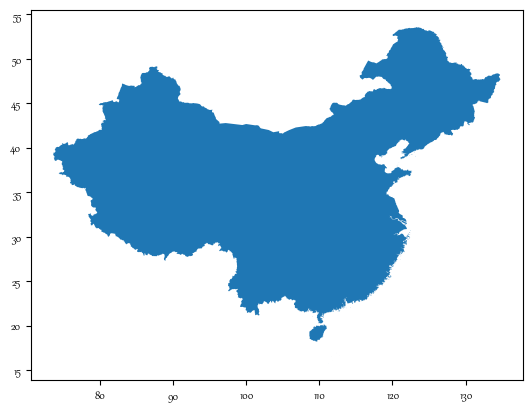

In [3]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
china = df.loc[df['ADMIN'] == 'China']
china.plot()

In [4]:
asia_rivers = pd.concat([gpd.read_file("../../Nature/rivers/data/rivers/asia/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/siberia/a00000009.gdbtable")])

print(asia_rivers)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM   DIST_DN_KM  DIST_UP_KM  \
0       40000001   40000019  40017702       2.48  3056.600098         6.9   
1       40000002   40000019  40017702       1.23  3056.800049         6.0   
2       40000003   40000015  40017702       1.26  3052.800049         7.4   
3       40000004   40000015  40017702       1.30  3052.600098         7.9   
4       40000005   40000004  40017702       0.69  3054.100098         6.4   
...          ...        ...       ...        ...          ...         ...   
677760  30677761   30677759  30676509       1.72   167.699997         6.8   
677761  30677762   30677755  30676509       4.58   179.199997        11.1   
677762  30677763   30677759  30676509       5.53   167.699997        12.9   
677763  30677764   30677763  30676509       1.41   173.300003         6.0   
677764  30677765   30677763  30676509       1.38   173.100006         7.5   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \

In [5]:
asia_rivers = gpd.sjoin(asia_rivers, china, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
asia_rivers = asia_rivers.drop(columns=['index_right'])

In [7]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

asia_lakes = gpd.sjoin(lakes, china, op='intersects')
asia_lakes = lakes.loc[lakes.index.isin(asia_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(asia_rivers, asia_lakes, op='within')
asia_rivers = asia_rivers.loc[~asia_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
asia_rivers = asia_rivers.loc[asia_rivers['ORD_FLOW'] < 8]

In [9]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp"), 
                    gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp")])

In [10]:
new_basins = gpd.sjoin(basins, china, op="intersects")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [11]:
from shapely.ops import unary_union

geoms = [unary_union(new_basins.loc[new_basins['MAJ_NAME'] == poly_basin].geometry.tolist()) for poly_basin in new_basins.MAJ_NAME.unique().tolist()]
geoms_area = [geom.area for geom in geoms]
names = [poly_basin for poly_basin in new_basins.MAJ_NAME.unique().tolist()]

In [12]:
new_basins = gpd.GeoDataFrame(pd.DataFrame({"name": names, "area": geoms_area}), geometry=geoms)

In [13]:
new_basins = new_basins.sort_values(["area"], ascending=False)

In [14]:
new_basins_copy = new_basins.copy()

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': 'crimson', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'darkred', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': 'navy', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': '#ee82ee',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000', 
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': 'crimson', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'green',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f'}

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})

In [15]:
print(colors_df)

                        basin   colors
0         Siberia, West Coast    black
1                          Ob  #ffa500
2                        Lena  #808000
3                     Yenisey  #483d8b
4        Siberia, North Coast  #dc143c
..                        ...      ...
83                     Hainan  #882D17
84           Baltic Sea Coast  #228B22
85            Sinai Peninsula  #3cb371
86  Andaman - Nicobar Islands  #875692
87                     Taiwan  #2f4f4f

[88 rows x 2 columns]


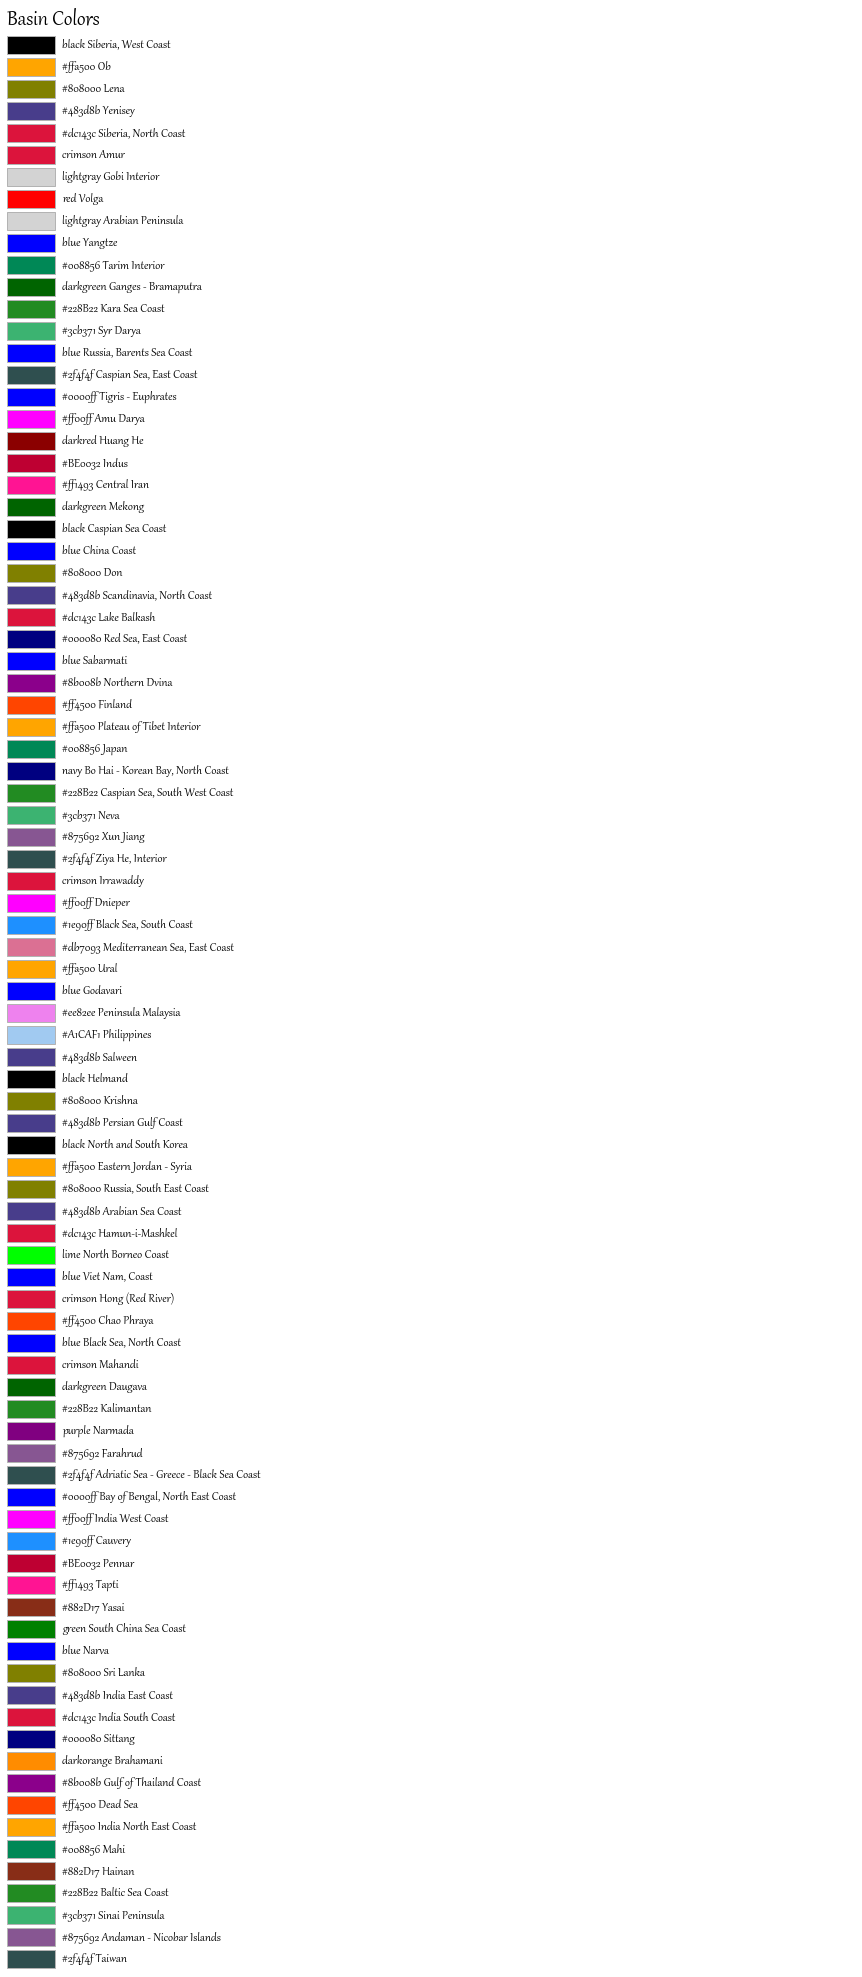

In [16]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colors.keys())
ncols = 1
nrows = len(colors.keys())
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colors.values(), colors.keys())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


In [17]:
new_basins_copy = pd.merge(new_basins_copy, colors_df, left_on='name', right_on='basin', how='left')

In [18]:
new_basins_copy = new_basins_copy[['name', 'geometry', 'colors']]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


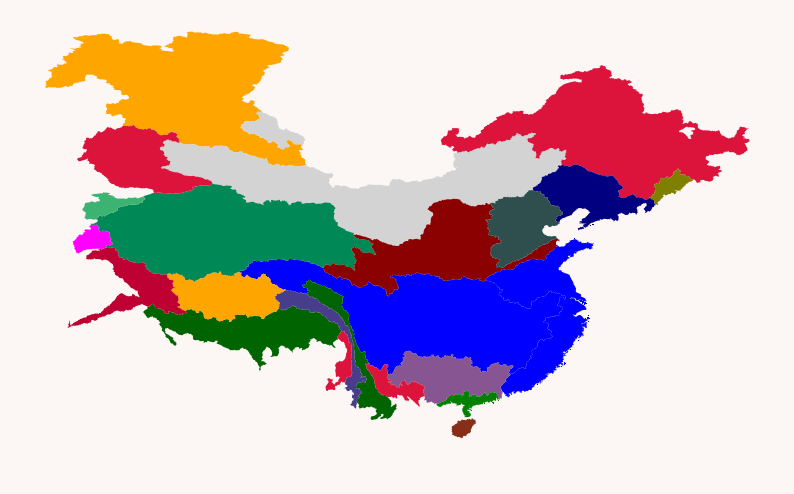

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
new_basins_copy.plot(ax=ax, column='name', color=new_basins_copy['colors'])
ax.axis('off')
plt.savefig("test.png", dpi=600, bbox_inches='tight')

In [20]:
rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_3824\549450257.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')


In [21]:
print(new_basins_copy)

                                name  \
0                                 Ob   
1                      Gobi Interior   
2                            Yangtze   
3                     Tarim Interior   
4                               Amur   
5                           Huang He   
6                        China Coast   
7                Ganges - Bramaputra   
8                       Lake Balkash   
9          Plateau of Tibet Interior   
10  Bo Hai - Korean Bay, North Coast   
11                         Xun Jiang   
12                 Ziya He, Interior   
13                             Indus   
14                            Mekong   
15                           Salween   
16                  Hong (Red River)   
17                         Syr Darya   
18                         Amu Darya   
19          Russia, South East Coast   
20             South China Sea Coast   
21                         Irrawaddy   
22                            Hainan   
23                   Viet Nam, Coast   


In [22]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.04, max_value=0.8)

In [23]:
x = unary_union(china.geometry.tolist())
y = x.boundary
asia = gpd.GeoDataFrame(pd.DataFrame({'name': ['asia']}), crs="EPSG:4326", geometry=[y])

In [24]:
names_colors = rivers_basins[['colors', 'name']].drop_duplicates()
colors = names_colors['colors']
print(colors)
name = names_colors['name']
print(name)

13069        crimson
98901      lightgray
160479       #ffa500
181897          navy
197201       #808000
197707       #dc143c
252084       #008856
274293       #2f4f4f
309798       darkred
416574          blue
482555          blue
493787       #BE0032
530242       #ffa500
554895     darkgreen
589058       #483d8b
633767     darkgreen
743651       crimson
869366       #875692
939447       crimson
1087943        green
1187869      #882D17
Name: colors, dtype: object
13069                                  Amur
98901                         Gobi Interior
160479                                   Ob
181897     Bo Hai - Korean Bay, North Coast
197201             Russia, South East Coast
197707                         Lake Balkash
252084                       Tarim Interior
274293                    Ziya He, Interior
309798                             Huang He
416574                          China Coast
482555                              Yangtze
493787                                Indus
530

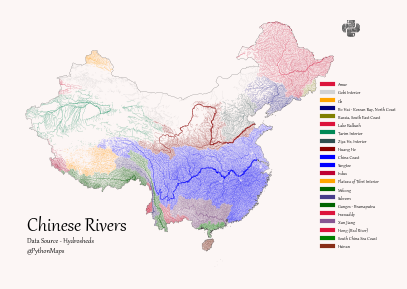

In [27]:
from matplotlib.lines import Line2D


fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.72, 0.8, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.18, "Chinese Rivers",
              size=16,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.05, 0.1, "Data Source - Hydrosheds\n@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)

LegendElement = [Line2D([0],[0], color=color, lw=3, label=label) for color, label in zip(colors, name)]
ax.legend(handles=LegendElement, fontsize=4, frameon=False, framealpha=0, bbox_to_anchor=(1.15, 0.75))

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/china.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [26]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)